### VISION : MOTION ESTIMATION PW REPORT

**Authors:**  
*Maximilien NOWAK*  
*Matthieu DE CASTELBAJAC*

In this practical work report, we compare and experiment with two methods to compute the optical flow using pairs of images - the Horn & Schunck method and the Lucas & Kanade scheme. We provide a python `method_name.py` library for each, and test them with the attached dataset.

In [1]:
%load_ext autoreload
%autoreload 2

### Horn & Schunk 

In [26]:
from python.horn import optimize_horn, horn
from python.lucasKanade import optimize_LK, lucasKanade, lucasKanade2
from python.utils import get_data, plot_errors
from python.middlebury import computeColor
import matplotlib.pyplot as plt

In [3]:
# select data prepare ground truths (index = 0 : mysin, 1 : square, 2 : yosemite)
wgt, I1, I2 = get_data(2)

In [4]:
# get error values and best parameters 
alphas, best_alphas, epe, best_epe, ang, best_ang, norm, best_norm = optimize_horn(I1, I2, wgt)

100%|██████████| 15/15 [00:23<00:00,  1.57s/it]


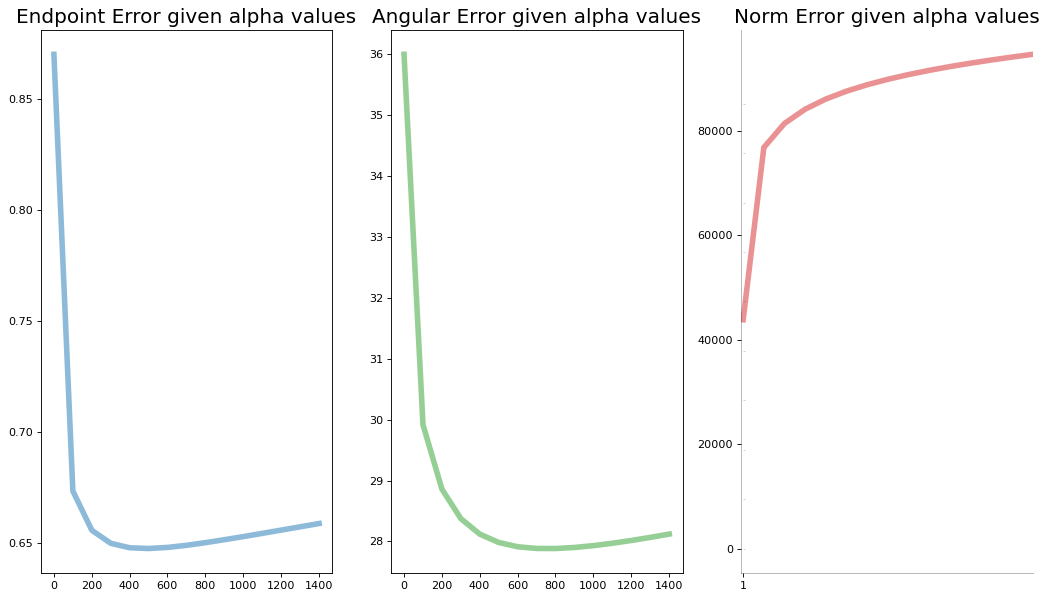

In [5]:
# plot error curves and display best results
plot_errors(alphas, [epe,ang,norm])

In [6]:
# Get results
w_epe = horn(I1, I2, alpha=best_alphas[0], N=150)
w_ang =  horn(I1, I2, alpha=best_alphas[1], N=150)

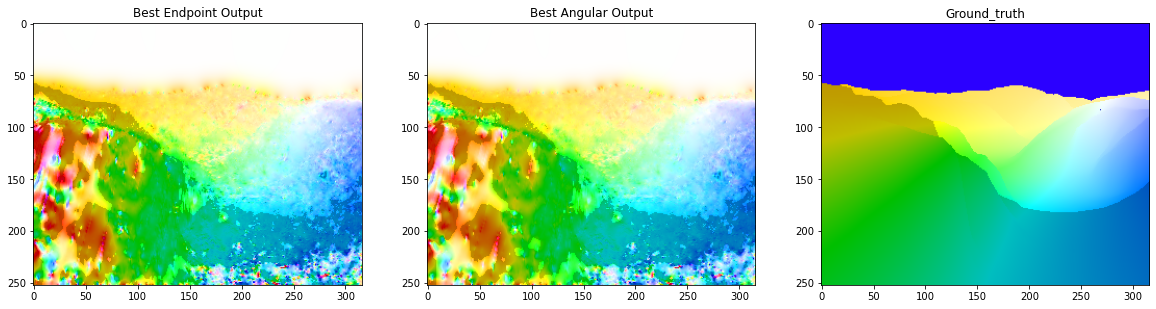

In [7]:
# Plot Results 
fig, ax = plt.subplots(1,3, figsize=(20,20))
ax[0].imshow(computeColor(w_epe))
ax[1].imshow(computeColor(w_ang))
ax[0].set_title('Best Endpoint Output')
ax[1].set_title('Best Angular Output')
ax[2].imshow(computeColor(wgt))
ax[2].set_title('Ground_truth')
plt.show()

**Comments**  
*Square* --> correctness  
*Mysim* --> best alpha value ?  
*Yosemite and error plots* -->

In [23]:
wins, best_win, epe, best_epe, ang, best_ang, norm, best_norm = optimize_LK(I1, I2, wgt,2,100)

100%|██████████| 19/19 [01:37<00:00,  5.13s/it]


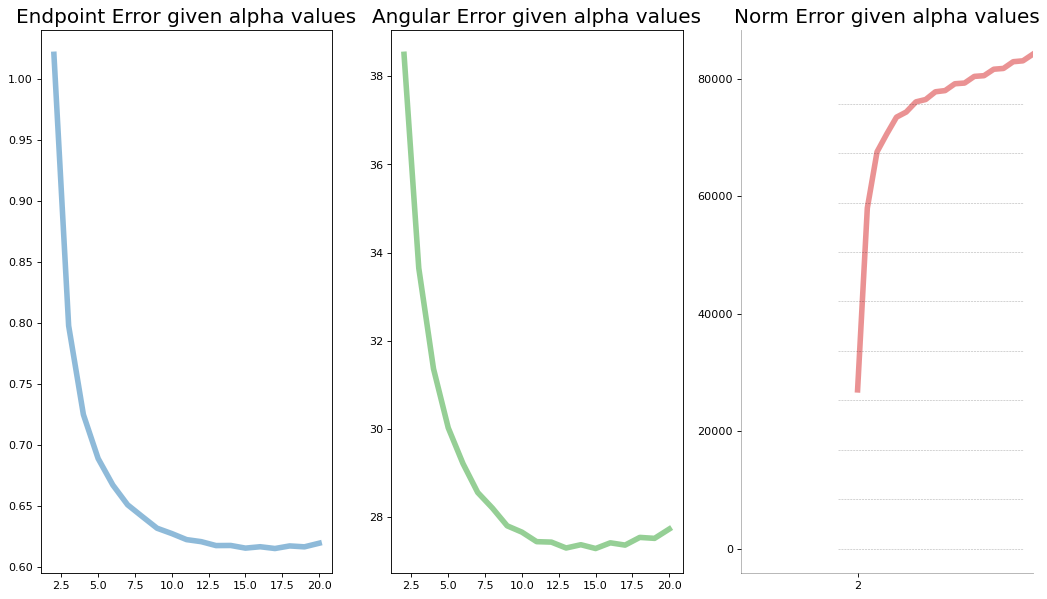

In [24]:
# plot error curves and display best results
plot_errors(wins, [epe,ang,norm])

In [27]:
# Get results
w_epe = lucasKanade2(I1, I2, best_win[0])
w_ang =  lucasKanade2(I1, I2, best_win[1])

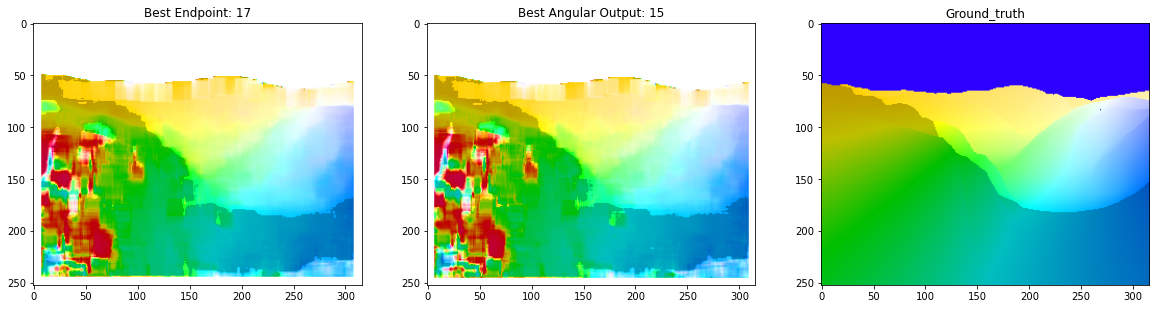

In [28]:
fig, ax = plt.subplots(1,3, figsize=(20,20))
ax[0].imshow(computeColor(w_epe))
ax[1].imshow(computeColor(w_ang))
ax[0].set_title(f'Best Endpoint: {best_win[0]}')
ax[1].set_title(f'Best Angular Output: {best_win[1]}')
ax[2].imshow(computeColor(wgt))
ax[2].set_title('Ground_truth')
plt.show()